In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [4]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

[[1.  5.1 2.5 3.  1.1]
 [1.  6.2 2.8 4.8 1.8]
 [1.  5.  3.5 1.3 0.3]
 [1.  6.3 2.8 5.1 1.5]
 [1.  6.7 3.  5.  1.7]
 [1.  4.8 3.4 1.9 0.2]
 [1.  4.4 2.9 1.4 0.2]
 [1.  5.4 3.4 1.7 0.2]
 [1.  4.6 3.6 1.  0.2]
 [1.  5.  2.3 3.3 1. ]
 [1.  5.5 3.5 1.3 0.2]
 [1.  6.2 2.2 4.5 1.5]
 [1.  5.2 4.1 1.5 0.1]
 [1.  6.9 3.1 5.1 2.3]
 [1.  7.2 3.2 6.  1.8]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.8 2.8 5.1 2.4]
 [1.  6.7 3.  5.2 2.3]
 [1.  7.7 3.  6.1 2.3]
 [1.  6.7 3.1 5.6 2.4]
 [1.  4.9 3.  1.4 0.2]
 [1.  6.5 3.  5.2 2. ]
 [1.  7.6 3.  6.6 2.1]
 [1.  6.2 2.9 4.3 1.3]
 [1.  4.9 2.4 3.3 1. ]
 [1.  5.6 2.9 3.6 1.3]
 [1.  5.6 3.  4.5 1.5]
 [1.  6.9 3.1 4.9 1.5]
 [1.  6.6 2.9 4.6 1.3]
 [1.  5.1 3.5 1.4 0.3]
 [1.  5.1 3.4 1.5 0.2]
 [1.  7.4 2.8 6.1 1.9]
 [1.  5.7 2.5 5.  2. ]
 [1.  6.5 3.2 5.1 2. ]
 [1.  5.1 3.7 1.5 0.4]
 [1.  5.5 4.2 1.4 0.2]
 [1.  5.1 3.5 1.4 0.2]
 [1.  6.3 2.5 5.  1.9]
 [1.  6.  2.2 4.  1. ]
 [1.  6.1 2.6 5.6 1.4]
 [1.  6.7 3.3 5.7 2.5]
 [1.  5.7 2.8 4.5 1.3]
 [1.  5.  3.6 1.4 0.2]
 [1.  6.4 2

ValueError: shapes (2500,3) and (5,) not aligned: 3 (dim 1) != 5 (dim 0)

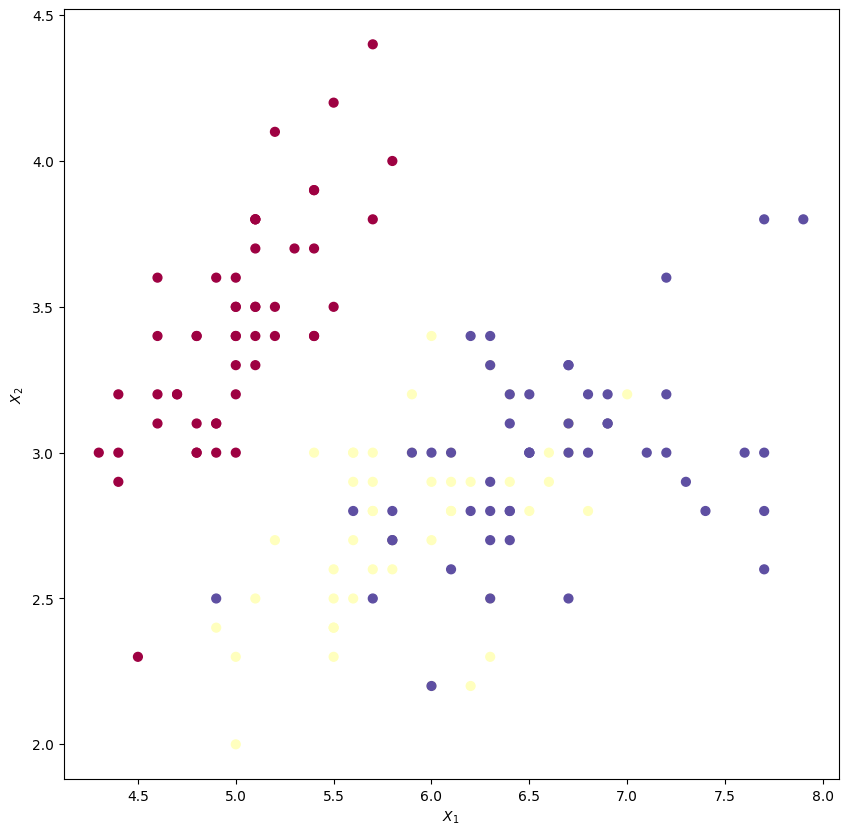

<Figure size 1000x1000 with 0 Axes>

In [11]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calc_h(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

bc = datasets.load_iris()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

XX = add_intercept(X_train)
theta = np.zeros(XX.shape[1])
h = calc_h(XX, theta)

print(XX)
print(theta)
print(h)

def accuracy(y_true, y_pred)-> float:
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(accuracy(y_test, predictions))
plt.figure(figsize=(10, 10))

# define 2d grid
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

# make predictions on the grid
grid = add_intercept(grid)
probs = calc_h(grid, theta)
probs = probs.reshape(xx1.shape)

# plot contours
ax = plt.gca()
plt.contourf(xx1, xx2, probs, levels=25, cmap=plt.cm.Spectral, alpha=0.8)
plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black') # decision boundary at 0.5
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.plot(-0.8, 0.8, 'bx', markersize=20, markeredgewidth=2)  # new observation correctly classified as 1 (blue)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
ax.set_xlim([x1_min, x1_max])
ax.set_ylim([x2_min, x2_max])

In [32]:
# Classifieur
clf = GaussianNB()
# Base d'exemples

ValueError: X has 2 features, but GaussianNB is expecting 4 features as input.

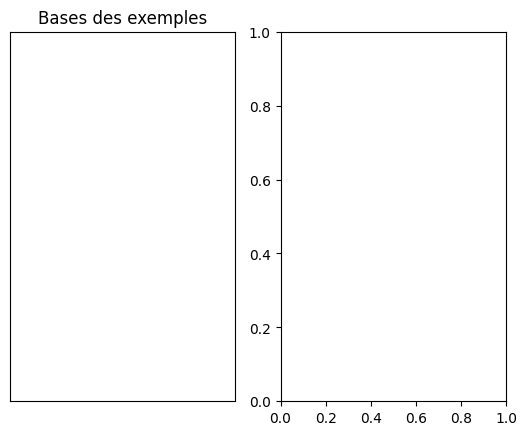

In [33]:
# Normaliser les données
X = StandardScaler().fit_transform(X)
# Exemples d'apprentissage + exemples de test
cm = plt.cm.Blues
cm_bright = ListedColormap(['#FFFF00', '#00FFFF'])
i=1
ax = plt.subplot(1, 2, 1)
ax.set_title("Bases des exemples")
# Afficher les données d'apprentissage + les données test
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
h = .02 # Pas de disrètisation du plan
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(()); ax.set_yticks(())
ax = plt.subplot(1, 2, 2) # Nouveau axe
rs=clf.fit(X_train, y_train)
accuracy = accuracy(y_test, predictions)
# Calculer la classe de chaque point du plan (après discrètisation) [x_min,␣x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # ravel pour␣concatener les lignes 2D to 1D
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape) # 1D to 2D
ax.contourf(xx, yy, Z, cmap=cm, alpha=.65) # Tracer
# Superposition avec les données
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.1)
ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(()); ax.set_yticks(())
ax.set_title("Naive Bayes")
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % accuracy).lstrip('0'), size=10, horizontalalignment='right')